### 1. chardet 설치
텍스트 파일의 인코딩을 자동감지 되도록 설정

In [ ]:
!pip install chardet

### 2. Google Drive 마운트 및 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 3. 데이터셋 압축 해제

MAC유저

In [ ]:
# 필요한 라이브러리 및 모듈 임포트
import zipfile
import os

def extract_and_fix_encoding(zip_file_path, extract_to):
    # ZIP 파일 열기
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            # 파일 이름을 인코딩 문제 해결
            try:
                # 먼저 UTF-8로 시도
                decoded_name = member.encode('cp437').decode('utf-8')
            except UnicodeDecodeError:
                # UTF-8이 실패하면 cp437로 해석
                decoded_name = member.encode('utf-8').decode('cp437')

            # 압축 해제할 파일의 경로 생성
            member_path = os.path.join(extract_to, decoded_name)

            # 디렉토리인 경우 디렉토리 생성
            if member.endswith('/'):
                os.makedirs(member_path, exist_ok=True)
            else:
                # 파일인 경우 압축 해제
                os.makedirs(os.path.dirname(member_path), exist_ok=True)
                with zip_ref.open(member) as source, open(member_path, 'wb') as target:
                    target.write(source.read())
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# ZIP 파일들 목록
zip_files = ['한혜승.zip', '김지현.zip', '김수명.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_and_fix_encoding(zip_file_path, extract_path)

print("모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/한혜승.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김지현.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김수명.zip 압축 해제 완료.
모든 압축 파일 해제 및 인코딩 문제 해결이 완료되었습니다.


window유저

In [ ]:
# 압축 해제 함수 (인코딩 문제 없음)
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f'{zip_file_path} 압축 해제 완료.')

# 압축 파일이 있는 폴더 경로
zip_folder = '/content/drive/MyDrive/YOLO/k-food'

# 압축을 풀어야 할 경로
extract_path = '/content/YOLO/dataset'

# 압축 파일 목록 (인코딩 문제 없는 파일)
zip_files = ['손민지.zip', '김예지.zip']

# 각각의 ZIP 파일 압축 해제
for zip_file in zip_files:
    zip_file_path = os.path.join(zip_folder, zip_file)
    extract_zip(zip_file_path, extract_path)

print("압축 해제가 완료되었습니다.")

/content/drive/MyDrive/YOLO/k-food/손민지.zip 압축 해제 완료.
/content/drive/MyDrive/YOLO/k-food/김예지.zip 압축 해제 완료.
압축 해제가 완료되었습니다.


### 4. 데이터셋 정리

In [ ]:
# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/손민지'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

손민지 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


In [ ]:
# 중간 폴더 경로
middle_folder = '/content/YOLO/dataset/김수명'
# 상위 폴더 경로
parent_folder = '/content/YOLO/dataset'

# 중간 폴더 내의 모든 하위 폴더 및 파일을 상위 폴더로 이동
for item in os.listdir(middle_folder):
    item_path = os.path.join(middle_folder, item)
    new_path = os.path.join(parent_folder, item)

    # 같은 이름의 폴더나 파일이 상위 폴더에 이미 존재할 경우 삭제 후 이동
    if os.path.exists(new_path):
        if os.path.isdir(new_path):
            shutil.rmtree(new_path)  # 폴더일 경우 삭제
        else:
            os.remove(new_path)  # 파일일 경우 삭제

    shutil.move(item_path, parent_folder)  # 중간 폴더에서 상위 폴더로 이동

# 중간 폴더 삭제
shutil.rmtree(middle_folder)

print("김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.")

김수명 폴더가 삭제되고 하위 폴더들이 dataset 바로 밑에 이동되었습니다.


MAC유저의 MACOSX 폴더 삭제

In [ ]:
# _MACOSX 폴더 삭제 함수
def delete_macosx_folders(directory):
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            if dir_name == '__MACOSX':
                macosx_path = os.path.join(root, dir_name)
                print(f'찾은 _MACOSX 폴더: {macosx_path}')
                try:
                    shutil.rmtree(macosx_path, ignore_errors=True)  # 강제로 삭제
                    print(f'{macosx_path} 삭제 완료.')
                except Exception as e:
                    print(f'{macosx_path} 삭제 중 오류 발생: {e}')

# 압축 해제된 폴더 경로
dataset_directory = '/content/YOLO/dataset'

# _MACOSX 폴더 삭제 실행
delete_macosx_folders(dataset_directory)

찾은 _MACOSX 폴더: /content/YOLO/dataset/__MACOSX
/content/YOLO/dataset/__MACOSX 삭제 완료.


### 5. 데이터셋 확인

In [ ]:
!ls -a /content/YOLO/dataset

송편	수제비	  애호박볶음	      갈치구이	    동태찌개  비빔밥	    제육볶음
보쌈	비빔냉면  고등어조림	      감자채볶음    된장찌개  삼겹살	    조개구이
쫄면	배추김치  오이소박이	      감자탕	    두부김치  삼계탕	    족발
파전	간장게장  시금치나물	      갓김치	    등갈비    소세지볶음    주꾸미볶음
식혜	갈치조림  깻잎장아찌	      고등어구이    떡갈비    수육	    주먹밥
수정과	김치찌개  고사리나물	      곱창구이	    떡국      순대	    찜닭
호박전	잔치국수  미역줄기볶음	      김밥	    떡볶이    순두부찌개    추어탕
무생채	총각김치  메추리알장조림      김치볶음밥    만두국    숯불닭갈비    칼국수
물냉면	숙주나물  .		      김치찜	    매운무국  시래기국	    콩국수
막국수	감자조림  ..		      김치콩나물국  매운탕    약과	    콩나물국
호박죽	연근조림  .DS_Store	      꽈리고추무침  멸치볶음  약식	    콩나물무침
김치전	양념게장  .ipynb_checkpoints  누룽지	    무국      어묵볶음	    콩자반
감자전	두부조림  LA갈비	      닭갈비	    미역국    오징어채볶음  편육
깍두기	가지볶음  갈비구이	      닭계장	    백김치    육회	    한ᄀ

In [ ]:
#경로 설정
dataset_directory = '/content/YOLO/dataset'

#폴더 개수 확인
def count_folders(directory):
  folder_count = 0
  for item in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, item)):
      folder_count += 1
  return folder_count

#폴더 개수 출력
folder_count = count_folders(dataset_directory)
print(f'폴더 개수: {folder_count}')

폴더 개수: 107


### 6. 데이터셋 분할
8:2 비율로 학습/검증 데이터 나눔

In [ ]:
import random

# 이미지와 라벨 파일들이 들어있는 경로
dataset_dir = '/content/YOLO/dataset'
output_dir = '/content/YOLO/yolo_dataset'

# train과 val 데이터가 저장될 폴더 경로
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

# 각 폴더가 없으면 생성
os.makedirs(train_dir + '/images', exist_ok=True)
os.makedirs(train_dir + '/labels', exist_ok=True)
os.makedirs(val_dir + '/images', exist_ok=True)
os.makedirs(val_dir + '/labels', exist_ok=True)

# 데이터 분할 비율 (80%는 train, 20%는 val)
split_ratio = 0.8

# 중분류 폴더 순회
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)

    # 불필요한 폴더 제외
    if os.path.isdir(category_path) and category != '.ipynb_checkpoints':
        images_path = os.path.join(category_path, 'images')
        labels_path = os.path.join(category_path, 'labels')

        # 이미지와 라벨 폴더가 존재하는지 확인
        if os.path.exists(images_path) and os.path.exists(labels_path):
            # 이미지 파일 리스트 가져오기
            images = os.listdir(images_path)
            images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]  # 대소문자 구분 없이 이미지 파일만 선택
            random.shuffle(images)

            # 데이터 분할
            train_size = int(len(images) * split_ratio)
            train_images = images[:train_size]
            val_images = images[train_size:]

            # 짝이 맞는 파일만 복사
            def copy_files(image_list, destination_images, destination_labels):
                for img in image_list:
                    label_file = img.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
                    if os.path.exists(os.path.join(labels_path, label_file)):  # 라벨 파일이 있는 경우에만
                        shutil.copy(os.path.join(images_path, img), os.path.join(destination_images, img))
                        shutil.copy(os.path.join(labels_path, label_file), os.path.join(destination_labels, label_file))
                    else:
                        print(f"Warning: {img}에 대한 라벨 파일이 존재하지 않습니다.")

            # train 데이터 복사
            copy_files(train_images, train_dir + '/images', train_dir + '/labels')

            # val 데이터 복사
            copy_files(val_images, val_dir + '/images', val_dir + '/labels')

print("데이터 분할이 완료되었습니다.")

데이터 분할이 완료되었습니다.


### 7. 데이터 구성 파일 생성
data.yaml 파일을 생성하여 YOLO 모델 학습에 필요한 정보 설정

In [ ]:
# data.yaml 파일을 생성하는 코드
data_yaml = """
train: /content/YOLO/yolo_dataset/train/images  # train 이미지 경로
val: /content/YOLO/yolo_dataset/val/images      # val 이미지 경로

# 클래스 수
nc: 106  # 총 클래스 수

# 클래스 이름
names:
  - 갈비구이
  - 갈치구이
  - 고등어구이
  - 곱창구이
  - 닭갈비
  - 떡갈비
  - 불고기
  - 삼겹살
  - 장어구이
  - 조개구이
  - 떡국
  - 무국
  - 미역국
  - 북엇국
  - 시래기국
  - 콩나물국
  - 콩자반
  - 편육
  - 갓김치
  - 깍두기
  - 무생채
  - 배추김치
  - 백김치
  - 오이소박이
  - 총각김치
  - 파김치
  - 가지볶음
  - 고사리나물
  - 미역줄기볶음
  - 숙주나물
  - 시금치나물
  - 애호박볶음
  - 송편
  - 막국수
  - 물냉면
  - 비빔냉면
  - 수제비
  - 열무국수
  - 잔치국수
  - 쫄면
  - 칼국수
  - 콩국수
  - 꽈리고추무침
  - 도토리묵
  - 잡채
  - 콩나물무침
  - 김밥
  - 김치볶음밥
  - 누룽지
  - 비빔밥
  - 주먹밥
  - 감자채볶음
  - 두부김치
  - 떡볶이
  - 멸치볶음
  - 소세지볶음
  - 어묵볶음
  - 오징어채볶음
  - 제육볶음
  - 주꾸미볶음
  - 보쌈
  - 수정과
  - 식혜
  - 간장게장
  - 양념게장
  - 깻잎장아찌
  - 감자전
  - 계란말이
  - 김치전
  - 파전
  - 호박전
  - 갈치조림
  - 감자조림
  - 고등어조림
  - 두부조림
  - 메추리알장조림
  - 연근조림
  - 전복죽
  - 호박죽
  - 김치찌개
  - 닭계장
  - 동태찌개
  - 된장찌개
  - 순두부찌개
  - 갈비찜
  - 김치찜
  - 닭볶음탕
  - 수육
  - 순대
  - 족발
  - 찜닭
  - 갈비탕
  - 감자탕
  - 매운탕
  - 삼계탕
  - 추어탕
  - 약과
  - 약식
  - 한과
  - 육회
  - LA갈비
  - 등갈비
  - 숯불닭갈비
  - 만두국
  - 김치콩나물국
  - 매운무국
"""

# 파일 저장
yaml_file_path = '/content/YOLO/data.yaml'

with open(yaml_file_path, 'w') as file:
    file.write(data_yaml)

print("data.yaml 파일이 생성되었습니다.")

data.yaml 파일이 생성되었습니다.


### 8. YOLOv8 설치

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 50.2 MB/s eta 0:00:00


### 9. YOLOv8n 모델 학습

In [ ]:
# YOLOv8 모델을 사용하기 위해 Ultralytics 라이브러리에서 YOLO 클래스를 불러옴
from ultralytics import YOLO

# YOLOv8 모델 불러오기 (yolov8n.pt는 작은 모델, 필요에 따라 yolov8s.pt, yolov8m.pt로 변경 가능)
model = YOLO('yolov8n.pt')

# 모델 학습
model.train(
    data=yaml_file_path,    # data.yaml 파일 경로
    epochs=50,              # 에포크 수
    batch=32,               # 배치 크기
    imgsz=640,              # 이미지 크기
    name='yolo_food_model', # 실험 이름
    save=True,              # 모델 저장 여부
    save_period=10,         # 모델 저장 주기 (기본 값은 마지막만 저장)
    workers=8,              # 데이터 로딩 워커 수
    amp=True,               # Automatic Mixed Precision 활성화
    project='/content/YOLO/new_runs',  # 결과 저장 경로
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 346MB/s]

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/YOLO/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=/content/YOLO/new_runs, name=yolo_food_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, 

100%|██████████| 22.2M/22.2M [00:00<00:00, 87.8MB/s]


Overriding model.yaml nc=80 with nc=106

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 201MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 35.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks failed ❌. Anomalies were detected with AMP on your system that may lead to NaN losses or zero-mAP results, so AMP will be disabled during training.


train: Scanning /content/YOLO/yolo_dataset/train/labels... 69218 images, 101 backgrounds, 695 corrupt: 100%|██████████| 69220/69220 [00:57<00:00, 1208.53it/s]

train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0007.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0018.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0025.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0026.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0034.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0036.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
train: WARNING ⚠️ /content/YOLO/yolo_dataset/train/images/Img_000_0047.jpg: ignoring corrupt i

train: New cache created: /content/YOLO/yolo_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 78, len(boxes) = 70026. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/YOLO/yolo_dataset/val/labels... 17356 images, 20 backgrounds, 176 corrupt: 100%|██████████| 17356/17356 [00:14<00:00, 1165.03it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0091.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0092.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0107.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0122.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0127.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0139.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0167.jpg: ignoring corrupt image/label: labels require 5

val: New cache created: /content/YOLO/yolo_dataset/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 17554. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/YOLO/new_runs/yolo_food_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/YOLO/new_runs/yolo_food_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.15G      1.428       5.17      1.833         76        640:   0%|          | 5/2142 [00:02<09:22,  3.80it/s]

       1/50      9.37G      1.394       5.14      1.806         86        640:   0%|          | 9/2142 [00:02<05:46,  6.15it/s]
100%|██████████| 755k/755k [00:00<00:00, 67.3MB/s]
       1/50      9.37G      1.045      3.953      1.475         33        640: 100%|██████████| 2142/2142 [04:59<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:06<00:00,  4.07it/s]


                   all      17180      17554      0.383      0.437      0.342       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.17G      1.115      2.424      1.472         29        640: 100%|██████████| 2142/2142 [04:58<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:03<00:00,  4.27it/s]


                   all      17180      17554        0.5      0.525      0.516      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.13G      1.132      2.108      1.468         34        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.29it/s]


                   all      17180      17554      0.517      0.543      0.532       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      9.15G      1.138      1.829      1.468         38        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.30it/s]


                   all      17180      17554      0.636      0.624      0.663      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.15G      1.105      1.607      1.442         37        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.32it/s]


                   all      17180      17554      0.709      0.684      0.738      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.12G      1.083      1.475      1.426         34        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.32it/s]


                   all      17180      17554      0.723      0.736      0.777      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      9.12G      1.068      1.408      1.415         42        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.29it/s]


                   all      17180      17554      0.751      0.753      0.802      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      9.12G      1.056       1.35      1.407         37        640: 100%|██████████| 2142/2142 [04:57<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.30it/s]


                   all      17180      17554      0.766      0.768      0.819      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.14G      1.051      1.308      1.402         33        640: 100%|██████████| 2142/2142 [04:57<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.31it/s]


                   all      17180      17554      0.786      0.775      0.832      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.14G      1.043      1.271      1.395         31        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.32it/s]


                   all      17180      17554       0.79      0.787      0.841      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.12G      1.036      1.242      1.391         36        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.34it/s]


                   all      17180      17554      0.801       0.79      0.848      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.14G      1.029      1.216      1.386         36        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.807      0.797      0.853      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.14G      1.026      1.194      1.384         34        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.808      0.798      0.856        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.12G       1.02      1.177       1.38         35        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.34it/s]


                   all      17180      17554      0.809      0.805      0.858      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.12G      1.019       1.16      1.378         33        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.809      0.807       0.86      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.12G       1.01      1.136      1.374         34        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.808      0.811      0.862      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.12G      1.009      1.126      1.371         40        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.34it/s]


                   all      17180      17554      0.817      0.807      0.864      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.12G      1.004      1.111       1.37         27        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.819       0.81      0.866       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.14G      1.003        1.1      1.367         31        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.817      0.815      0.867      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.12G      1.001      1.089      1.366         40        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.34it/s]


                   all      17180      17554       0.82      0.816      0.869      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.12G     0.9969      1.076      1.362         42        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.827      0.812       0.87      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.12G     0.9976      1.064      1.363         31        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.33it/s]


                   all      17180      17554       0.83      0.813      0.872      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.14G     0.9943      1.056       1.36         35        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.34it/s]


                   all      17180      17554      0.832      0.812      0.874      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.12G     0.9894      1.039      1.358         31        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.37it/s]


                   all      17180      17554      0.834      0.813      0.875      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.11G     0.9874      1.032      1.355         36        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.37it/s]


                   all      17180      17554      0.838      0.813      0.876       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.14G     0.9848      1.022      1.355         28        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.34it/s]


                   all      17180      17554      0.836      0.818      0.878      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.14G     0.9799      1.011      1.351         39        640: 100%|██████████| 2142/2142 [04:56<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.837       0.82      0.879      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.11G     0.9784      1.002       1.35         39        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.831      0.828       0.88      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.11G     0.9765     0.9907      1.347         33        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.834      0.828      0.882      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.11G      0.972     0.9788      1.346         34        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.837      0.828      0.883      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.11G     0.9707     0.9684      1.344         28        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.839       0.83      0.884      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.11G     0.9626     0.9568      1.339         31        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.842       0.83      0.886      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.11G     0.9635     0.9497      1.339         35        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.843      0.833      0.887       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.14G      0.961     0.9348      1.337         27        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.842      0.837      0.888      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      9.11G     0.9562     0.9323      1.334         29        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.845      0.836       0.89      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.11G     0.9541     0.9172      1.333         32        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.845      0.839      0.891      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.14G       0.95     0.9081      1.331         39        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.37it/s]


                   all      17180      17554      0.846      0.841      0.892      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.11G     0.9472     0.8948      1.328         34        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554       0.85      0.839      0.893      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      9.14G     0.9429     0.8831      1.327         31        640: 100%|██████████| 2142/2142 [04:55<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.36it/s]


                   all      17180      17554      0.852      0.841      0.894      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.16G     0.9405      0.872      1.323         35        640: 100%|██████████| 2142/2142 [04:57<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.855       0.84      0.895      0.639
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.11G     0.9341     0.6813       1.47         14        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.30it/s]


                   all      17180      17554      0.855      0.843      0.896       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.11G     0.9246     0.6531      1.461         13        640: 100%|██████████| 2142/2142 [04:52<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.32it/s]


                   all      17180      17554      0.856      0.846      0.897      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.11G      0.916     0.6271      1.452         13        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.34it/s]


                   all      17180      17554       0.86      0.844      0.898      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.11G     0.9078       0.61      1.445         13        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.32it/s]


                   all      17180      17554      0.862      0.843      0.899      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      9.11G     0.9009      0.593      1.437         14        640: 100%|██████████| 2142/2142 [04:52<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.33it/s]


                   all      17180      17554      0.863      0.844        0.9      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.12G     0.8953     0.5764      1.431         13        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.864      0.846      0.902      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      9.11G     0.8863     0.5567      1.424         13        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.35it/s]


                   all      17180      17554      0.865      0.848      0.903      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.11G     0.8795     0.5434      1.419         14        640: 100%|██████████| 2142/2142 [04:53<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:01<00:00,  4.34it/s]


                   all      17180      17554      0.866      0.848      0.904      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.11G     0.8726     0.5259      1.412         13        640: 100%|██████████| 2142/2142 [04:52<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.33it/s]


                   all      17180      17554      0.865      0.851      0.905       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      9.11G     0.8643     0.5108      1.405         13        640: 100%|██████████| 2142/2142 [04:52<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:02<00:00,  4.33it/s]


                   all      17180      17554      0.868      0.852      0.906      0.651

50 epochs completed in 4.987 hours.
Optimizer stripped from /content/YOLO/new_runs/yolo_food_model/weights/last.pt, 5.7MB
Optimizer stripped from /content/YOLO/new_runs/yolo_food_model/weights/best.pt, 5.7MB

Validating /content/YOLO/new_runs/yolo_food_model/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 186 layers, 2,751,622 parameters, 0 gradients, 7.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 269/269 [01:08<00:00,  3.94it/s]


                   all      17180      17554      0.868      0.852      0.906      0.651
                  갈치구이        179        179      0.828      0.866      0.897       0.53
                 고등어구이        179        180       0.91      0.917       0.94      0.616
                  곱창구이        154        163      0.841      0.551      0.738      0.341
                   닭갈비        136        140      0.847      0.831      0.913      0.549
                   떡갈비        176        177       0.93      0.902      0.934      0.464
                   불고기        166        171      0.789      0.807      0.877      0.545
                   삼겹살        122        122      0.824      0.779      0.844      0.473
                  장어구이        172        184      0.824      0.687      0.776      0.412
                  조개구이        179        185      0.864      0.827      0.898      0.568
                    떡국        144        148      0.831      0.498       0.71      0.327
                    무

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 102, 103, 104, 105])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ade9f0aa110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,   

### 10. 학습된 모델 로드 및 성능 평가

In [ ]:
# 학습된 모델 로드 (best.pt 파일 경로 확인)
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 검증 데이터로 성능 평가
metrics = model.val()

# mAP 등 성능 지표 출력
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 186 layers, 2,751,622 parameters, 0 gradients, 7.2 GFLOPs


val: Scanning /content/YOLO/yolo_dataset/val/labels.cache... 17356 images, 20 backgrounds, 176 corrupt: 100%|██████████| 17356/17356 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0091.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0092.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0107.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0122.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0127.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0139.jpg: ignoring corrupt image/label: labels require 5 columns, 4 columns detected
val: WARNING ⚠️ /content/YOLO/yolo_dataset/val/images/Img_000_0167.jpg: ignoring corrupt image/label: labels require 5

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 17554. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1074/1074 [01:13<00:00, 14.57it/s]


                   all      17180      17554      0.868      0.852      0.906      0.651
                  갈치구이        179        179      0.828      0.866      0.897      0.531
                 고등어구이        179        180       0.91      0.917       0.94      0.616
                  곱창구이        154        163      0.833      0.552      0.738      0.341
                   닭갈비        136        140      0.847      0.831      0.912      0.549
                   떡갈비        176        177       0.93      0.902      0.934      0.463
                   불고기        166        171      0.793      0.807      0.875      0.543
                   삼겹살        122        122      0.823      0.779      0.843      0.473
                  장어구이        172        184      0.824      0.688      0.776      0.414
                  조개구이        179        185      0.862      0.827      0.898      0.568
                    떡국        144        148      0.841      0.499      0.711      0.327
                    무

### 11. YOLO 학습 결과 백업

In [ ]:
import shutil

# YOLO 학습 결과가 있는 runs 폴더 경로
source_folder = '/content/YOLO/new_runs'
# 구글 드라이브에 저장할 경로
destination_folder = '/content/drive/MyDrive/YOLO/new_runs'

# 폴더를 복사
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/YOLO/new_runs'

### 12. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
검증데이터 이미지로 성능 확인 및 바운딩 박스 그리기


image 1/1 /content/YOLO/yolo_dataset/val/images/Img_036_0553.jpg: 640x640 1 수제비, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


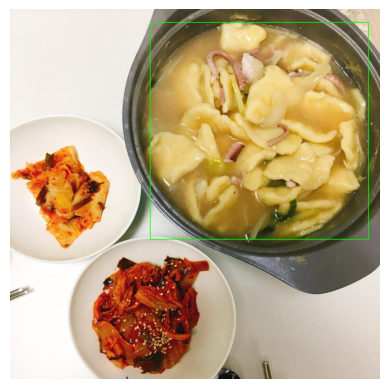

Randomly selected image: Img_036_0553.jpg


In [ ]:
from matplotlib import pyplot as plt
import cv2

# 모델 로드
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 검증 이미지 폴더 경로
val_images_dir = '/content/YOLO/yolo_dataset/val/images'

# 검증 데이터에서 랜덤으로 이미지 선택
random_image = random.choice(os.listdir(val_images_dir))

# 선택된 이미지 경로
random_image_path = os.path.join(val_images_dir, random_image)

# 선택된 이미지로 예측 수행
results = model.predict(random_image_path)

# 결과 출력
for result in results:
    # 이미지를 불러오기
    img = cv2.imread(random_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 불러오므로 RGB로 변환

    # 바운딩 박스 그리기
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = [int(coord) for coord in box]  # 바운딩 박스 좌표
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 바운딩 박스 그리기

    # 예측 결과 시각화
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print(f"Randomly selected image: {random_image}")

### 13. Koreanize Matplotlib 라이브러리를 설치
시각화에서 한글 사용하기 위해

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 94.9 MB/s eta 0:00:00


### 14. 테스트 이미지로 모델 성능 확인 및 바운딩 박스 표시
새로운 테스트 이미지(객체 인식이 가능할 이미지)로 성능 확인 및 바운딩 박스 그리기


image 1/1 /content/drive/MyDrive/YOLO/test.jpg: 448x640 1 고등어구이, 11.8ms
Speed: 3.5ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


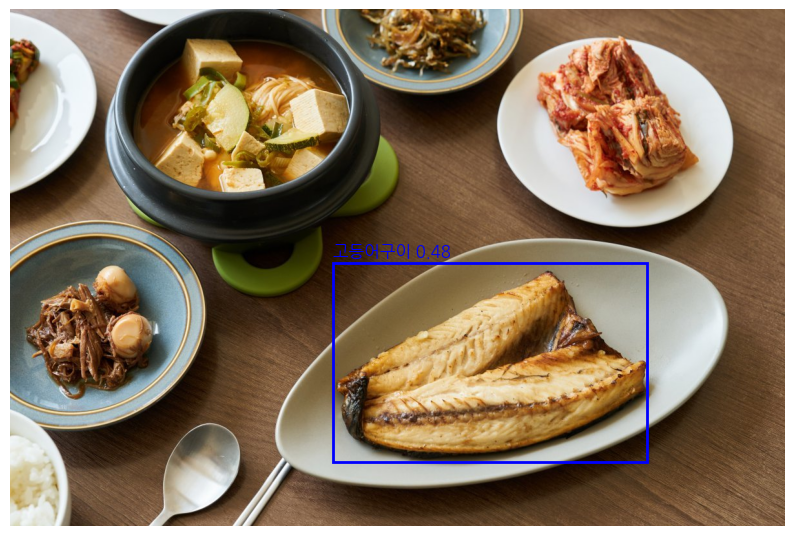

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/YOLO/test6.jpg: 480x640 1 갈치조림, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


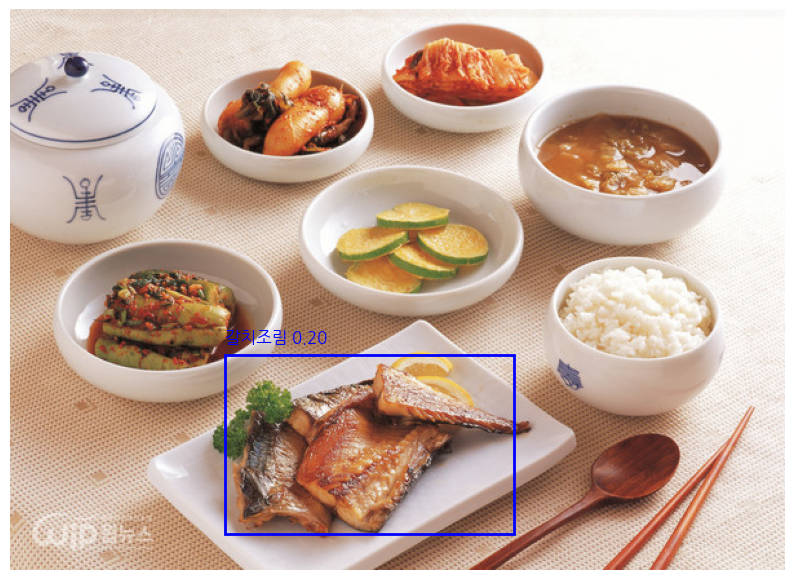

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test6.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

예측 수치가 낮았던 송편 테스트


image 1/1 /content/drive/MyDrive/YOLO/test5.png: 448x640 1 송편, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


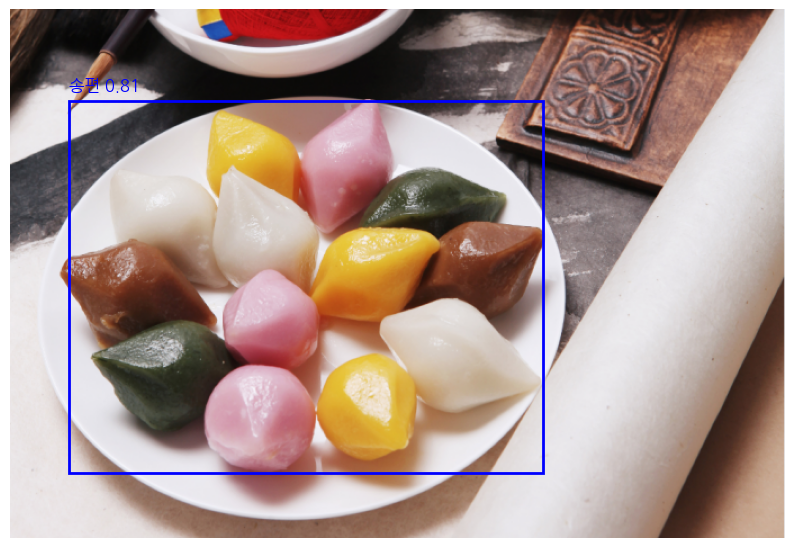

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/drive/MyDrive/YOLO/test5.png'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

객체 인식이 가능한지 한사진에 두개의 잔치국수가 있는 훈련 데이터 이미지 사용


image 1/1 /content/YOLO/yolo_dataset/train/images/Img_038_0155.jpg: 640x480 2 잔치국수s, 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


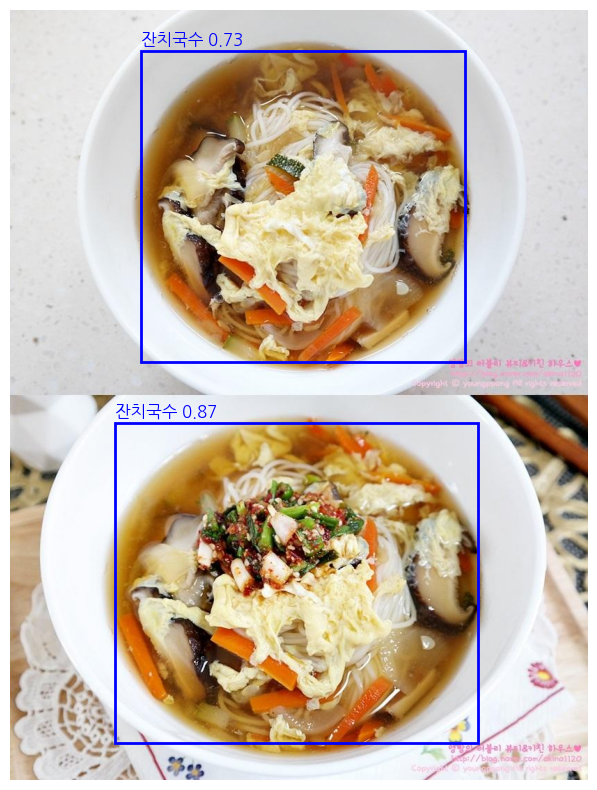

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트를 위해 필요

# 모델로드
model = YOLO('/content/YOLO/new_runs/yolo_food_model/weights/best.pt')

# 테스트 이미지 경로
image_path = '/content/YOLO/yolo_dataset/train/images/Img_038_0155.jpg'

# 이미지를 읽어들임
image = cv2.imread(image_path)

# YOLO 모델로 추론 (객체 탐지)
results = model(image_path, conf=0.1)

# 탐지된 객체들을 순회하면서 바운딩 박스를 그리기
plt.figure(figsize=(10, 10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 레이블

    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)  # 좌표를 정수로 변환
        label = model.names[int(cls)]  # 클래스 이름

        # 바운딩 박스 그리기 (파란색)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='blue', facecolor='none', linewidth=2))

        # 클래스 이름과 신뢰도 그리기 (한글 지원)
        plt.text(x1, y1 - 10, f'{label} {score:.2f}', color='blue', fontsize=12)

# 축 없애기
plt.axis('off')
plt.show()

수동 라벨링 데이터를 사용하니 mAP 높아지고 안정적인 바운딩 박스, 여러가지 객체가 인식이 잘 안됨 → 더 큰 모델 사용
